# Five Personality Clustering

**EXT** = Extraversion
>Extraversion (or extroversion) is a personality trait characterized by excitability, sociability, talkativeness, assertiveness, and high amounts of emotional expressiveness.

**EST** = Neuroticism
> Neuroticism is a personality trait characterized by sadness, moodiness, and emotional instability.

**AGR** = Agreeableness     
> This personality trait includes attributes such as trust, altruism, kindness, affection, and other prosocial behaviors

**OPN** = Openess
>Openness (also referred to as openness to experience) emphasizes imagination and insight the most out of all five personality traits.

**CSN** = Conscientiousness
>Among each of the personality traits, conscientiousness is one defined by high levels of thoughtfulness, good impulse control, and goal-directed behaviors.


https://www.verywellmind.com/the-big-five-personality-dimensions-2795422

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


In [17]:
df = pd.read_csv("data-final-clean.csv")
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'country'],
      dtype='object')

In [18]:
df_ext_p = df[['EXT1', 'EXT3', 'EXT5', 'EXT7', 'EXT9']]
df_est_p = df[['EST1', 'EST3', 'EST5', 'EST6', 'EST7', 'EST8','EST9', 'EST10']]
df_agr_p = df[['AGR2', 'AGR4', 'AGR6', 'AGR8', 'AGR9', 'AGR10']]
df_csn_p = df[['CSN1', 'CSN3', 'CSN5', 'CSN7', 'CSN9', 'CSN10']]
df_opn_p = df[['OPN1', 'OPN3', 'OPN5', 'OPN7', 'OPN8', 'OPN9', 'OPN10']]

df_ext_n = df[['EXT2', 'EXT4', 'EXT6', 'EXT8','EXT10']]
df_est_n = df[['EST2', 'EST4']]
df_agr_n = df[['AGR1', 'AGR3', 'AGR5', 'AGR7']]
df_csn_n = df[['CSN2', 'CSN4', 'CSN6', 'CSN8']]
df_opn_n = df[['OPN2', 'OPN4', 'OPN6']]

In [19]:
df_means = pd.DataFrame()

df_means["Extraversion"] = df_ext_p.mean(axis=1) - df_ext_n.mean(axis=1)
df_means["Neuroticism"] = df_est_p.mean(axis=1) - df_est_n.mean(axis=1)
df_means["Agreeableness"] = df_agr_p.mean(axis=1) - df_agr_n.mean(axis=1)
df_means["Openess"] = df_csn_p.mean(axis=1) - df_csn_n.mean(axis=1)
df_means["Conscientiousness"] = df_opn_p.mean(axis=1) - df_opn_n.mean(axis=1)

#df_means

# Going to use a sample as too much data is taking too long! Random_state to assure I get the same seed for running again

sample_df = df_means.sample(10000, random_state=23)
sample_df.reset_index(drop=True, inplace=True)
sample_df

,Extraversion,Neuroticism,Agreeableness,Openess,Conscientiousness
0,1.0,-0.750,3.166667,-1.250000,3.714286
1,1.6,1.000,0.833333,-1.500000,3.142857
2,-2.0,-1.000,2.250000,-0.166667,3.857143
3,0.6,-0.750,0.500000,0.333333,1.380952
4,-2.6,0.000,-0.666667,3.500000,2.904762
...,...,...,...,...,...
9995,0.0,-0.375,1.916667,2.916667,-0.523810
9996,-3.6,1.625,-0.166667,-0.083333,2.857143
9997,-0.2,1.000,0.750000,-0.166667,0.047619
9998,-1.6,0.000,0.083333,-0.333333,-0.047619


In [20]:
scaler = StandardScaler()
decomp = PCA(n_components=2)
cluster = KMeans(5)
pipe = make_pipeline(scaler, decomp, cluster)
pipe.fit(sample_df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=5))])

In [21]:
pipe['pca'].explained_variance_ratio_.cumsum()


array([0.31061316, 0.51918485])

In [22]:
values = pipe[:2].transform(sample_df)

pca_labels = [f"PC{idx+1}" for idx, i in enumerate(values.T)]

sample_df = sample_df.join(pd.DataFrame(values, columns = pca_labels))

sample_df["clusters"] = pipe["kmeans"].labels_

In [23]:
#sample_df.to_csv("PCA_Clustered_df_TEST.csv")

In [40]:
df = pd.read_csv("PCA_Clustered_df_TEST.csv", index_col=0)

cluster_names = {0:"Shaggy", 1:"Daphne", 2:"Scooby-Doo", 3:"Velma", 4:"Fred"}
df["clusters"] = [cluster_names[i] for i in df["clusters"]]

df

,Extraversion,Neuroticism,Agreeableness,Openess,Conscientiousness,PC1,PC2,clusters
0,1.0,-0.750,3.166667,-1.250000,3.714286,-1.080153,1.602162,Shaggy
1,1.6,1.000,0.833333,-1.500000,3.142857,0.182158,1.592254,Shaggy
2,-2.0,-1.000,2.250000,-0.166667,3.857143,-0.221398,0.442219,Shaggy
3,0.6,-0.750,0.500000,0.333333,1.380952,0.133967,-0.433072,Fred
4,-2.6,0.000,-0.666667,3.500000,2.904762,0.537787,-1.809201,Fred
...,...,...,...,...,...,...,...,...
9995,0.0,-0.375,1.916667,2.916667,-0.523810,-0.190107,-1.600849,Fred
9996,-3.6,1.625,-0.166667,-0.083333,2.857143,2.012198,0.109066,Velma
9997,-0.2,1.000,0.750000,-0.166667,0.047619,1.236161,-0.099520,Velma
9998,-1.6,0.000,0.083333,-0.333333,-0.047619,1.684959,-0.764358,Velma


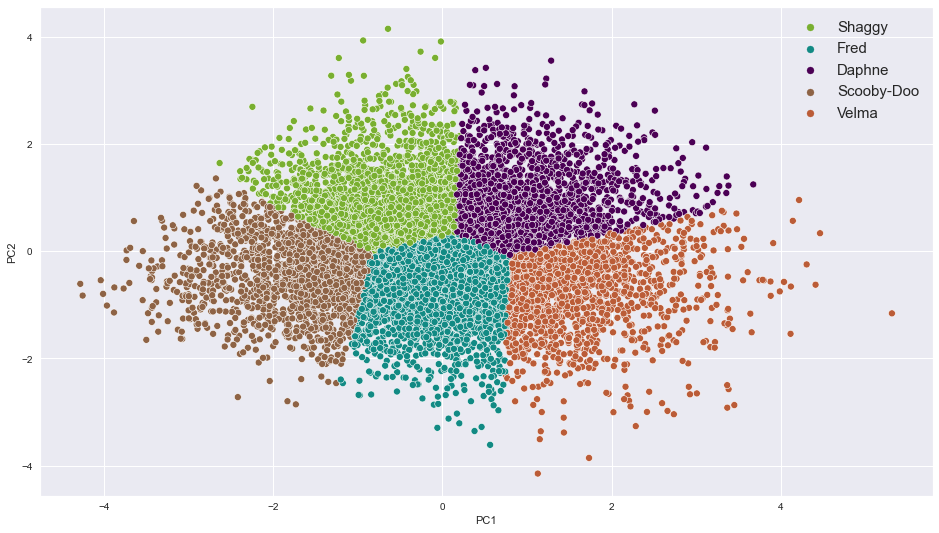

In [93]:
plt.figure(figsize=(16,9))

sns.set_style("darkgrid")

sns.scatterplot(data = df, x = "PC1", y = "PC2", hue = "clusters", palette=["#79af30", "#128a84", "#4b0055", "#8e6345", "#bb5c37"])

plt.legend(fontsize = 15)
plt.show()

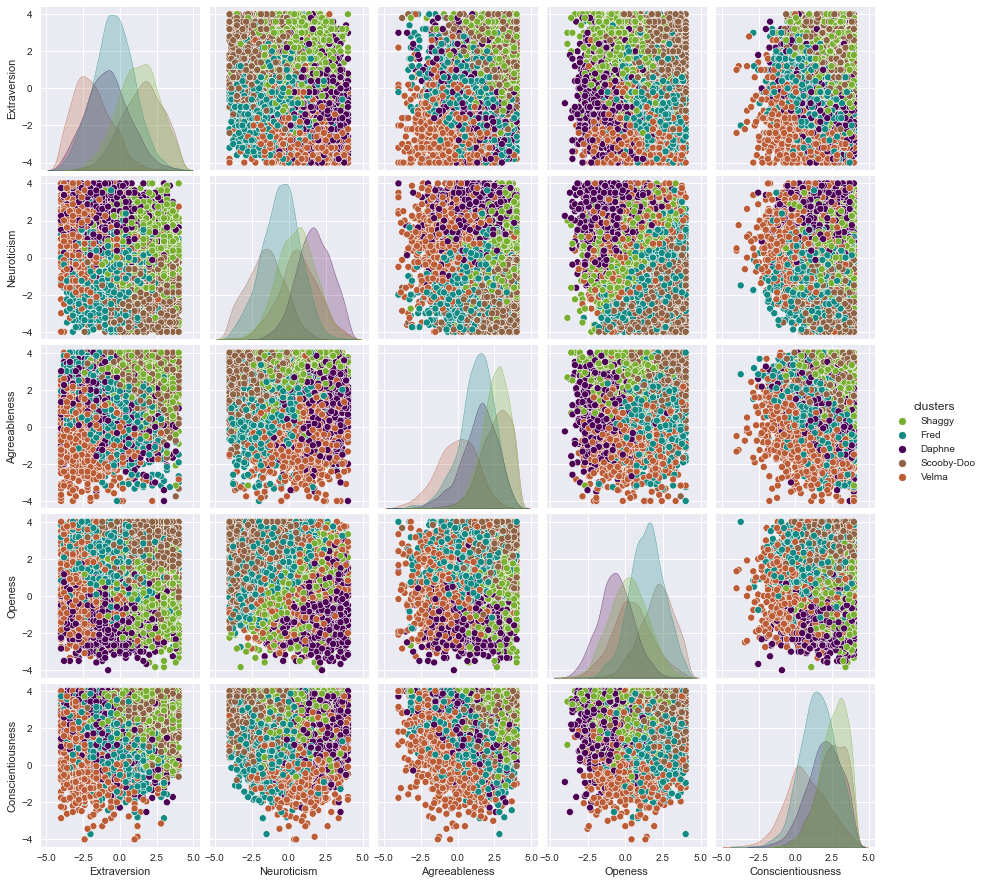

In [64]:
sns.pairplot(df[['Extraversion', 'Neuroticism', 'Agreeableness', 'Openess', 'Conscientiousness', "clusters"]], hue="clusters", palette=["#79af30", "#128a84", "#4b0055", "#8e6345", "#bb5c37"])

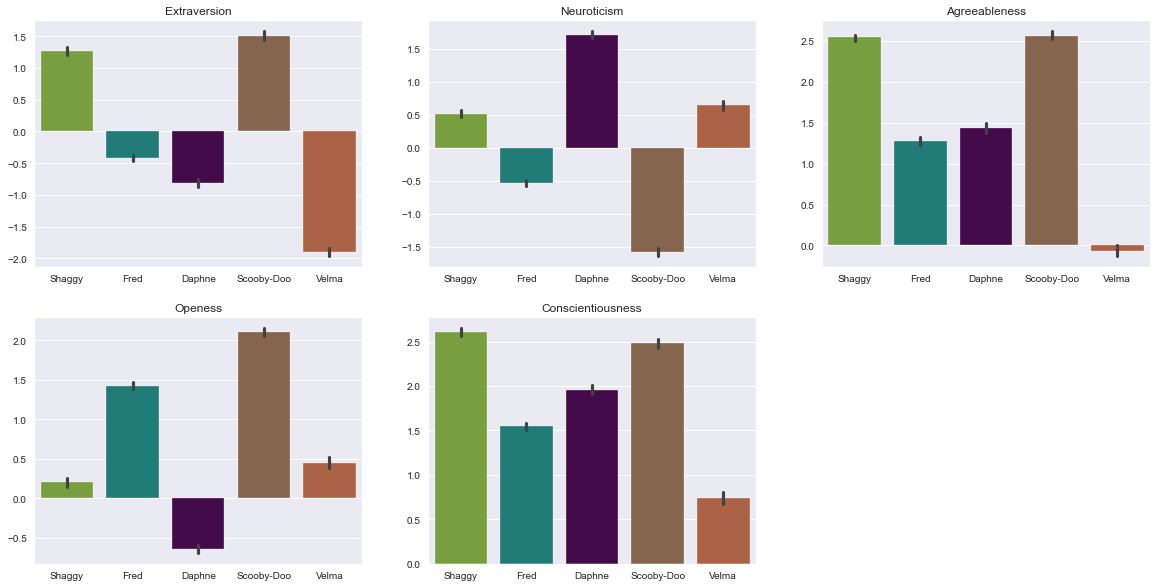

In [65]:
import math

var_list = ['Extraversion', 'Neuroticism', 'Agreeableness', 'Openess', 'Conscientiousness']

rows = math.ceil(len(var_list)/3)

fig, axs = plt.subplots(rows, 3, figsize=(20,5*rows))

for i, ax in zip(var_list, axs.flat):
    g = sns.barplot(data=df, x="clusters", y=i, ax=ax, palette=["#79af30", "#128a84", "#4b0055", "#8e6345", "#bb5c37"])
    ax.set(xlabel="", ylabel="", title=i)
    
for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()
    
plt.show()

#### Overview from Graph

        Cluster 0:      Shaggy
            -   EXT - High
            -   EST - Slightly High
            -   AGR - High
            -   OPN - Faily Low
            -   CSN - High

        Cluster 1:      Daphne
            -   EXT - Low
            -   EST - High
            -   AGR - Mid
            -   OPN - Low
            -   CSN - Mid
        
        Cluster 2:      Scooby-Doo
            -   EXT - High
            -   EST - Low
            -   AGR - High
            -   OPN - High
            -   CSN - High

        Cluster 3:      Velma
            -   EXT - Low
            -   EST - Slightly High
            -   AGR - Low
            -   OPN - Faily Low
            -   CSN - Low

        Cluster 4:      Fred
            -   EXT - Mid
            -   EST - Fairly Low
            -   AGR - Mid
            -   OPN - High
            -   CSN - Mid


#### Patterns from Graph

- More Extraversion = More Agreeableness
- More Interversion = Less Agreeableness
- High Neuroticism = Less Openess
- Agreeableness closly correlated with Conscientiousness


##### Presention Plan

1. Into to data and traits
2. Scooby-Doo
3. Cluster Graph
4. Bar Charts
5. People questionaires (If there is time)
6. Conclusion